## PROJECT 3 - World Happiness Report

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
import geopandas as gpd
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

## Question 1. Use the given datasets 2015-2019.csv files and create a dataframe to hold the averages of the given data. Some of the data for some countries are missing. Remove any missing country which has any missing data. 
$\color{red}{\text{Answer:}}$  First,i have combined all the csv data file into one dataframe called new_df. Then dropped the rank column and sort by country. Second, i find the rows with missing data and zero values. Third, i deleted those countries . Fourth, i find the average of each country and group them by country

In [4]:
# Read the CSV files
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

# Combine csv files into a dataset
new_df = pd.concat([pd.read_csv(f"{i}.csv") for i in range(2015, 2020)])

# Drop 'Rank' column
new_df.drop('Rank', axis=1, inplace=True)

# Sort by country
new_df.sort_values(by='Country', inplace=True)
new_df



,Country,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
153,Afghanistan,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680
152,Afghanistan,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100
144,Afghanistan,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000
153,Afghanistan,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000
140,Afghanistan,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871
...,...,...,...,...,...,...,...,...
143,Zimbabwe,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000
145,Zimbabwe,3.663,0.366000,1.114000,0.433000,0.361000,0.089000,0.151000
114,Zimbabwe,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870
130,Zimbabwe,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030


In [5]:
# Find rows with missing data
missing_rows = new_df[new_df.isna().any(axis=1)]
print("Countries with missing data")
# Display missing rows
display(missing_rows)


Countries with missing data


,Country,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
19,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,NaN,0.186


In [6]:
# Find rows with zero values
zero_rows = new_df[new_df.eq(0).any(axis=1)]
print("countries with zero values")
# Display rows with zero values
display(zero_rows)


countries with zero values


,Country,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
153,Afghanistan,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000
139,Angola,3.795,0.858428,1.104412,0.049869,0.000000,0.069720,0.097926
141,Angola,3.795,0.730000,1.125000,0.269000,0.000000,0.061000,0.079000
86,Bosnia and Herzegovina,5.163,0.933830,0.643670,0.707660,0.095110,0.000000,0.298890
89,Bosnia and Herzegovina,5.182,0.982409,1.069336,0.705186,0.204403,0.000000,0.328867
92,Bosnia and Herzegovina,5.129,0.915000,1.078000,0.758000,0.280000,0.000000,0.216000
154,Central African Republic,3.083,0.026000,0.000000,0.105000,0.225000,0.035000,0.235000
147,Central African Republic,3.678,0.078500,0.000000,0.066990,0.488790,0.082890,0.238350
154,Central African Republic,3.083,0.024000,0.000000,0.010000,0.305000,0.038000,0.218000
154,Central African Republic,2.693,0.000000,0.000000,0.018773,0.270842,0.056565,0.280876


In [7]:
# find the countries has the missing data and zero value data
missingcountry = set(missing_rows['Country'].to_list())
print("The countries with the missing data:\n",missingcountry)
zerovaluecountry = set(zero_rows['Country'].to_list())
print("The countries with the zero value data:\n",zerovaluecountry)


The countries with the missing data:
 {'United Arab Emirates'}
The countries with the zero value data:
 {'Bosnia and Herzegovina', 'Afghanistan', 'Sierra Leone', 'Swaziland', 'Togo', 'Lesotho', 'Moldova', 'Sudan', 'Indonesia', 'Iraq', 'Greece', 'Angola', 'Central African Republic', 'Congo (Kinshasa)', 'Somalia'}


In [8]:
#deleting the country with the missing_data in the row
new_df = new_df[~(new_df.Country.isin(missingcountry))]
print("The data after deleting the missing countries:")
display(new_df)

The data after deleting the missing countries:


,Country,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
153,Afghanistan,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680
152,Afghanistan,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100
144,Afghanistan,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000
153,Afghanistan,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000
140,Afghanistan,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871
...,...,...,...,...,...,...,...,...
143,Zimbabwe,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000
145,Zimbabwe,3.663,0.366000,1.114000,0.433000,0.361000,0.089000,0.151000
114,Zimbabwe,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870
130,Zimbabwe,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030


In [9]:
# the data which remove the missding data
new_df = new_df[~(new_df.Country.isin(zerovaluecountry))]
print("Final data after deleting zero values countries:\n")
display(new_df)

Final data after deleting zero values countries:



,Country,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
108,Albania,4.644,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313
108,Albania,4.655,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400
111,Albania,4.586,0.916000,0.817000,0.790000,0.419000,0.032000,0.149000
106,Albania,4.719,0.947000,0.848000,0.874000,0.383000,0.027000,0.178000
94,Albania,4.959,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720
...,...,...,...,...,...,...,...,...
143,Zimbabwe,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000
145,Zimbabwe,3.663,0.366000,1.114000,0.433000,0.361000,0.089000,0.151000
114,Zimbabwe,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870
130,Zimbabwe,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030


In [10]:
#Calculate the averages for each feature
new_df = new_df.groupby('Country', as_index=False).mean()
display(new_df)


,Country,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
0,Albania,4.7126,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887
1,Algeria,5.6676,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219
2,Argentina,6.4594,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371
3,Armenia,4.3932,0.839133,0.890873,0.697851,0.216029,0.038767,0.082394
4,Australia,7.2762,1.394885,1.409006,0.914529,0.605043,0.314573,0.416078
...,...,...,...,...,...,...,...,...
149,Venezuela,5.5314,1.052468,1.323264,0.683741,0.213709,0.071444,0.057186
150,Vietnam,5.1546,0.723416,1.138384,0.722700,0.577207,0.091921,0.195664
151,Yemen,3.6258,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929
152,Zambia,4.5844,0.571761,0.932381,0.302761,0.462099,0.097337,0.218430


## Question 2. Check the correlation between the features and explain it. Which one correlates the most with the happiness score? 
$\color{red}{\text{Answer:}}$  The heat map shows that the GDP correlates the most 0.81 value with the happiness score.



In [12]:
# Exclude non-numeric columns
numeric_df = new_df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
corr_matrix




,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
Score,1.000000,0.807569,0.760191,0.772193,0.583017,0.363631,0.135143
GDP,0.807569,1.000000,0.704343,0.843360,0.388279,0.245267,-0.050455
Support,0.760191,0.704343,1.000000,0.647087,0.457127,0.147046,0.033174
Healthy,0.772193,0.843360,0.647087,1.000000,0.361566,0.251146,0.039409
Freedom,0.583017,0.388279,0.457127,0.361566,1.000000,0.457702,0.317165
Corruption,0.363631,0.245267,0.147046,0.251146,0.457702,1.000000,0.393995
Generosity,0.135143,-0.050455,0.033174,0.039409,0.317165,0.393995,1.000000


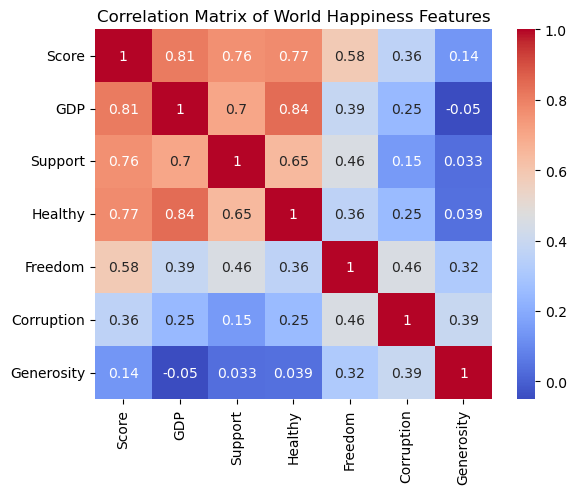

In [13]:
# Create heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix of World Happiness Features')
plt.show()

## Question 3. Apply PCA to reduce the dimension. Explain your results. As a good data visualizer expert, how many principal components should be used to transform this data without loosing much information? How many dimensions that could be reduced? 
$\color{red}{\text{Answer:}}$  After i apply the PCA the final variance ratio in percentage is 53.66%, 21.06%, 8.52%,8.02%,4.47%,2.29%, 1.98% respectively. So, as a good visualizer i would choose 5 principle components PC1,PC2,PC3,PC4 and PC5 to transfer the data without loosing much information because adding these 5 principal components becomes 95.73% which exceeds the variance threshold needed which is greater than 95%. Hence, we can reduce last two dimensions.  

In [15]:
# Select only the columns with numeric data
numeric_cols = new_df.select_dtypes(include=['int64', 'float64'])

# Create a new DataFrame with only the numeric columns
numeric_df = pd.DataFrame(numeric_cols)

# Show the first 5 rows of the new DataFrame
display(numeric_df)


,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
0,4.7126,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887
1,5.6676,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219
2,6.4594,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371
3,4.3932,0.839133,0.890873,0.697851,0.216029,0.038767,0.082394
4,7.2762,1.394885,1.409006,0.914529,0.605043,0.314573,0.416078
...,...,...,...,...,...,...,...
149,5.5314,1.052468,1.323264,0.683741,0.213709,0.071444,0.057186
150,5.1546,0.723416,1.138384,0.722700,0.577207,0.091921,0.195664
151,3.6258,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929
152,4.5844,0.571761,0.932381,0.302761,0.462099,0.097337,0.218430


In [16]:
scaled_data = preprocessing.scale(numeric_df)
#create a PCA object 
pca = PCA()
#fit the PCA to the scaled data
pca.fit(scaled_data)
#calculation principle component
principal_components=pca.components_
#showing the principle components
print('Principle components:\n',principal_components)

Principle components:
 [[ 0.48295031  0.45308795  0.42394424  0.44193811  0.34545745  0.23865803
   0.10066677]
 [-0.05379827 -0.25503367 -0.19676606 -0.20443747  0.34548237  0.54163835
   0.66243629]
 [-0.04039758  0.12100616 -0.3377468   0.06743108 -0.10796376  0.72493603
  -0.57264062]
 [ 0.02090691 -0.20983195  0.15972594 -0.38655291  0.74893245 -0.10308551
  -0.45724336]
 [ 0.022644   -0.18508473  0.73616962 -0.40131    -0.39355855  0.32569361
  -0.03564847]
 [ 0.76306858  0.14770107 -0.31568579 -0.50898    -0.17055283 -0.08584083
   0.02712316]
 [-0.42309488  0.78417169  0.01912839 -0.43452914  0.06905429 -0.00814837
   0.10976847]]


In [17]:
#transform the scaled data using PCA
pca_data = pca.transform(scaled_data)
print('Transformed data using PCA:\n',pca_data)

Transformed data using PCA:
 [[-0.98029721 -0.76482343  0.20579822 ... -1.35224617 -0.33869399
  -0.1125262 ]
 [-0.55221749 -1.52405651  1.09960467 ...  0.67533533  0.40057035
  -0.27597994]
 [ 1.14313331 -1.40916711 -0.12728553 ...  0.03495462  0.14839858
  -0.37420638]
 ...
 [-2.98499763 -0.72874578  0.4569409  ...  0.38645446 -0.30657218
   0.12163544]
 [-1.73853252  0.59646881 -0.22827634 ...  0.08070751  0.18736901
   0.26499753]
 [-2.61258608  0.06235574 -0.07755893 ...  0.84220062 -0.15786822
  -0.01839836]]


In [18]:
# Show the variance
print("Variance:")
print(pca.explained_variance_)

Variance:
[3.7810162  1.48362842 0.60003532 0.56539726 0.31466284 0.16138885
 0.13962274]


In [19]:
# print explained variance ratio in percentage 
var_ratio_pct = 100 * pca.explained_variance_ratio_
var_ratio_pct_formatted = [f'{x:.2f}%' for x in var_ratio_pct]
print("Variance ratio in percentage:")
print(var_ratio_pct_formatted)

Variance ratio in percentage:
['53.66%', '21.06%', '8.52%', '8.02%', '4.47%', '2.29%', '1.98%']


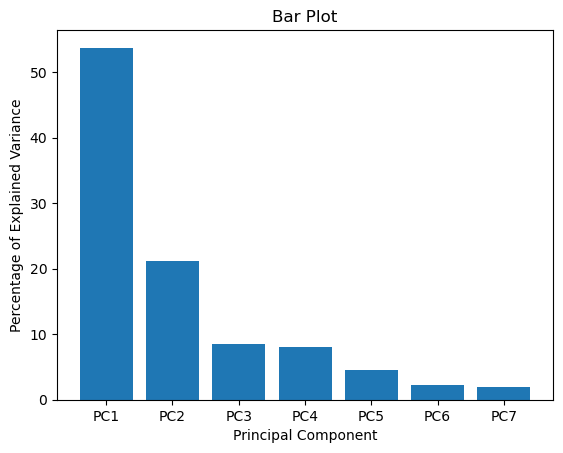

In [20]:
# Plot the variance ratios as a bar graph
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Bar Plot')
plt.show()

## Question 4. Which feature/features have the highest effect on the variance or in other words, which feature is responsible from the differences between countries the most?
$\color{red}{\text{Answer:}}$ Score has the highest effect on the variance i.e it feature score is responsible between countires the most.

In [22]:
# Create a new dataframe using the new data set pca_data
pca_df = pd.DataFrame(pca_data, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])
print(pca_df)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7
0   -0.980297 -0.764823  0.205798 -0.490219 -1.352246 -0.338694 -0.112526
1   -0.552217 -1.524057  1.099605 -0.903831  0.675335  0.400570 -0.275980
2    1.143133 -1.409167 -0.127286  0.746177  0.034955  0.148399 -0.374206
3   -1.686100 -1.621392  0.503676 -0.739983 -0.292902 -0.374498 -0.160709
4    3.437709  1.631139 -0.099418 -0.438923  0.170437  0.095570 -0.073839
..        ...       ...       ...       ...       ...       ...       ...
149 -0.215558 -2.109391  0.316881 -0.488564  0.987859 -0.010909 -0.150093
150  0.129402  0.068348 -0.358972  0.979798 -0.511956 -0.717219 -0.427765
151 -2.984998 -0.728746  0.456941  0.069920  0.386454 -0.306572  0.121635
152 -1.738533  0.596469 -0.228276  0.913442  0.080708  0.187369  0.264998
153 -2.612586  0.062356 -0.077559  0.537137  0.842201 -0.157868 -0.018398

[154 rows x 7 columns]


In [23]:
# Show the most important PC
variance_ratio=pca.explained_variance_ratio_ 
highest_pc_index = np.argmax(variance_ratio)
important_pc = pca.components_[highest_pc_index]
print(f"The most important PC with the highest variance ratio is PC{highest_pc_index+1}")

The most important PC with the highest variance ratio is PC1


In [24]:
# show the column which has the highest affect on the variance
print(pca.components_)

[[ 0.48295031  0.45308795  0.42394424  0.44193811  0.34545745  0.23865803
   0.10066677]
 [-0.05379827 -0.25503367 -0.19676606 -0.20443747  0.34548237  0.54163835
   0.66243629]
 [-0.04039758  0.12100616 -0.3377468   0.06743108 -0.10796376  0.72493603
  -0.57264062]
 [ 0.02090691 -0.20983195  0.15972594 -0.38655291  0.74893245 -0.10308551
  -0.45724336]
 [ 0.022644   -0.18508473  0.73616962 -0.40131    -0.39355855  0.32569361
  -0.03564847]
 [ 0.76306858  0.14770107 -0.31568579 -0.50898    -0.17055283 -0.08584083
   0.02712316]
 [-0.42309488  0.78417169  0.01912839 -0.43452914  0.06905429 -0.00814837
   0.10976847]]


In [25]:
print(pca.components_[0])

[0.48295031 0.45308795 0.42394424 0.44193811 0.34545745 0.23865803
 0.10066677]


In [26]:
highest_feature_index=np.argmax(np.abs((pca.components_[0])))
column_with_highest_affect=numeric_df.columns[highest_feature_index]   #0-PC1, 1-PC2, 2-PC3...
print(f"The feature with the highest effect on the variance is {column_with_highest_affect}")

The feature with the highest effect on the variance is Score


## Question 5. Show average happiness scores on a world map. 
$\color{red}{\text{Answer:}}$ 

In [28]:

Country_Happiness = px.choropleth(new_df, locations='Country', locationmode='country names', 
                                  color='Score', color_continuous_scale='Turbo', title = 'Average Happiness Score By Country Map')
Country_Happiness.update_layout(margin=dict(l=40, r=40, t=40, b=40))
Country_Happiness.show()



## Find and show  which countries are the outliers for each feature. If you remove these outliers how your results will change for the first 4 questions. Also show average happiness scores of these outliers on the world map and compare with the map from Question 5. 
_$\color{red}{\text{Answer:}}$ I have used zscore_outliers() function to calculate the z_score for each data point in the series based on the mean and standard deviation of the series to find out the outliers.i have used threshold of 2.5 to find out the outliers.i deleted the outliers and tried to compare with Q1-Q4 i did not find much difference the results are as follows:

In [30]:
new_df

,Country,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
0,Albania,4.7126,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887
1,Algeria,5.6676,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219
2,Argentina,6.4594,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371
3,Armenia,4.3932,0.839133,0.890873,0.697851,0.216029,0.038767,0.082394
4,Australia,7.2762,1.394885,1.409006,0.914529,0.605043,0.314573,0.416078
...,...,...,...,...,...,...,...,...
149,Venezuela,5.5314,1.052468,1.323264,0.683741,0.213709,0.071444,0.057186
150,Vietnam,5.1546,0.723416,1.138384,0.722700,0.577207,0.091921,0.195664
151,Yemen,3.6258,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929
152,Zambia,4.5844,0.571761,0.932381,0.302761,0.462099,0.097337,0.218430


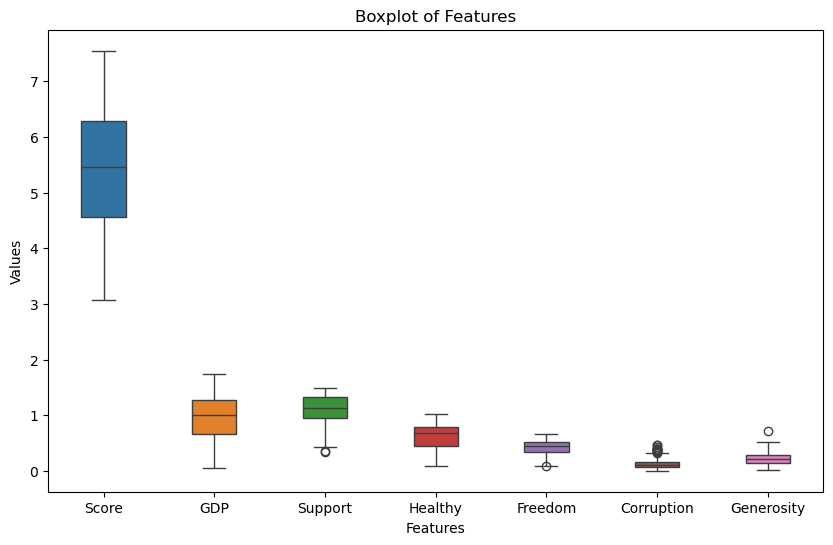

In [31]:
# Create a figure with custom size
fig, ax = plt.subplots(figsize=(10, 6))

# Create a boxplot of all features with custom settings
sns.boxplot(data=new_df[['Score', 'GDP', 'Support', 'Healthy', 'Freedom', 'Corruption', 'Generosity']], 
            ax=ax, width=0.4, showfliers=True)

# Add a title and axis labels
ax.set_title('Boxplot of Features')
ax.set_xlabel('Features')
ax.set_ylabel('Values')

# Show the plot
plt.show()


# As we can see the four features support, freedom, corrution and generosity has the outliers.

# Finding the outliers using z_score function

In [34]:
def zscore_outliers(series, threshold=2.5):
    z_scores = np.abs((series - series.mean()) / series.std())
    mask = z_scores > threshold
    series = series[mask]
    return series


<Axes: xlabel='Corruption'>

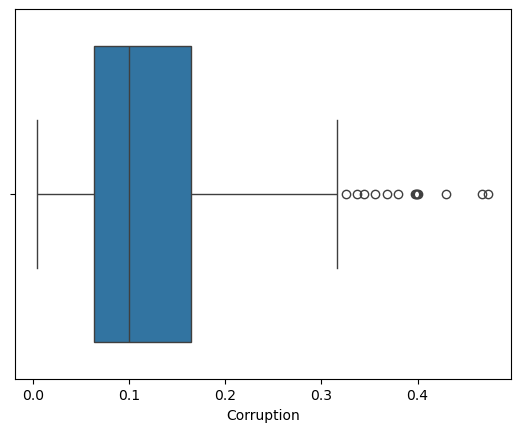

In [35]:
sns.boxplot(x=new_df["Corruption"])

In [36]:
df_outlier = zscore_outliers(new_df['Corruption'])
print(df_outlier)

33     0.429374
41     0.398474
94     0.400015
115    0.473468
119    0.467256
123    0.399280
130    0.397502
Name: Corruption, dtype: float64


<Axes: xlabel='Support'>

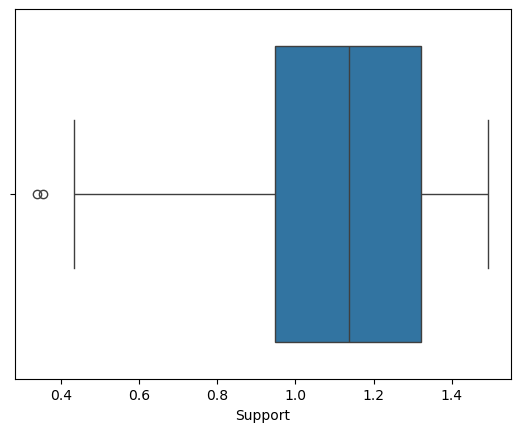

In [37]:
sns.boxplot(x=new_df["Support"])

In [38]:
df_outlier =zscore_outliers(new_df['Support'])
print(df_outlier)

12     0.340470
79     0.434382
132    0.355931
Name: Support, dtype: float64


<Axes: xlabel='Freedom'>

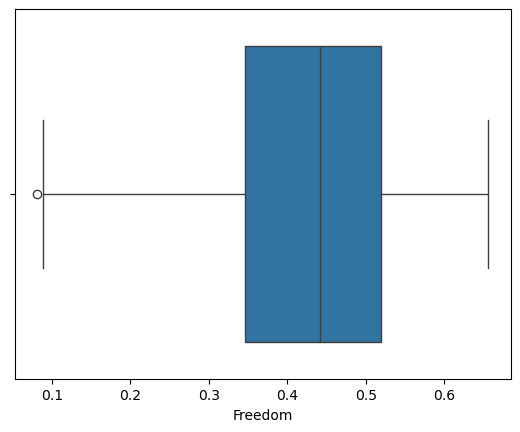

In [39]:
sns.boxplot(x=new_df["Freedom"])

In [40]:
df_outlier = zscore_outliers(new_df['Freedom'])
print(df_outlier)

50     0.089268
132    0.081700
Name: Freedom, dtype: float64


<Axes: xlabel='Generosity'>

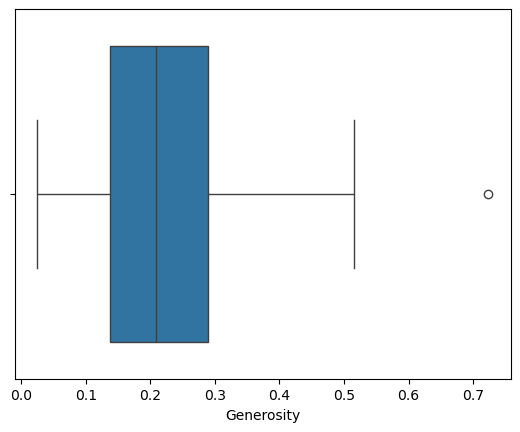

In [41]:
sns.boxplot(x=new_df["Generosity"])

In [42]:
df_outlier = zscore_outliers(new_df['Generosity'])
print(df_outlier)

90     0.723533
122    0.514790
Name: Generosity, dtype: float64


# Displaying the outliers in the dataframe by calculating zscore

In [44]:
# Select only the numeric columns
numeric_cols = new_df.select_dtypes(include='float')

# Calculate the z-scores for each column
z_scores = (numeric_cols - numeric_cols.mean()) / numeric_cols.std()

display(z_scores)


,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
0,-0.690058,-0.009294,-1.299383,0.688209,-0.408727,-0.856123,-0.470826
1,0.189084,0.178367,-0.084277,0.135632,-1.860019,0.120459,-1.320783
2,0.917989,0.425968,0.892889,0.567454,0.414381,-0.655800,-1.121342
3,-0.984087,-0.260498,-0.782011,0.283392,-1.578017,-0.898204,-1.207294
4,1.669908,1.142599,1.189920,1.259686,1.340274,1.719398,1.667186
...,...,...,...,...,...,...,...
149,0.063703,0.278105,0.863597,0.219816,-1.595416,-0.588072,-1.424443
150,-0.283167,-0.552648,0.159977,0.395355,1.131452,-0.393736,-0.231544
151,-1.690530,-1.143684,-0.878772,-1.214358,-1.366873,-0.629819,-1.082081
152,-0.808074,-0.935527,-0.624036,-1.496772,0.267938,-0.342333,-0.035426


In [45]:
# Find rows with at least one z-score greater than a threshold
threshold = 2.5
outliers = new_df[(z_scores.abs() > threshold).any(axis=1)]
print("The outliers when the threshold is 2.5 are:")
# Display outliers
display(outliers)

The outliers when the threshold is 2.5 are:


,Country,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
12,Benin,3.9010,0.376745,0.340470,0.275262,0.419387,0.071368,0.186070
33,Denmark,7.5460,1.396729,1.447688,0.865249,0.625959,0.429374,0.318876
41,Finland,7.5378,1.356960,1.434429,0.873836,0.621536,0.398474,0.217783
50,Haiti,3.8656,0.322862,0.616216,0.335746,0.089268,0.126076,0.448331
79,Malawi,3.8830,0.142714,0.434382,0.327070,0.457151,0.077424,0.271226
90,Myanmar,4.3830,0.474262,0.977419,0.452557,0.497316,0.186317,0.723533
94,New Zealand,7.3130,1.317509,1.439729,0.891618,0.617782,0.400015,0.432805
115,Rwanda,3.4386,0.322057,0.788453,0.417543,0.581611,0.473468,0.226311
119,Singapore,6.5428,1.592138,1.231079,1.014186,0.553412,0.467256,0.303215
122,Somaliland Region,5.0570,0.255580,0.758620,0.331080,0.391300,0.367940,0.514790


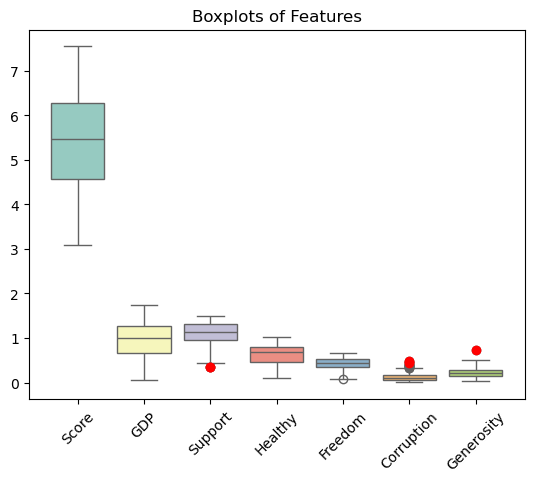

In [46]:
# Create boxplots for each feature
sns.boxplot(data=new_df, palette='Set3')
plt.title('Boxplots of Features')
plt.xticks(rotation=45)

# Highlight outliers in red
outliers = z_scores.abs() > 2.8
for col in numeric_cols.columns:
    y = numeric_cols[col][outliers[col]]
    x = [col]*len(y)
    plt.plot(x, y, 'ro')
    
plt.show()

# Deleting the outliers

In [48]:
#deleting the outliers creating the mask using ~ operator
outlier_mask = ~(z_scores.abs() > threshold).any(axis=1)

# Filter the dataframe based on the outlier mask
new_df_filtered = new_df[outlier_mask]
new_df_filtered

,Country,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
0,Albania,4.7126,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887
1,Algeria,5.6676,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219
2,Argentina,6.4594,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371
3,Armenia,4.3932,0.839133,0.890873,0.697851,0.216029,0.038767,0.082394
4,Australia,7.2762,1.394885,1.409006,0.914529,0.605043,0.314573,0.416078
...,...,...,...,...,...,...,...,...
149,Venezuela,5.5314,1.052468,1.323264,0.683741,0.213709,0.071444,0.057186
150,Vietnam,5.1546,0.723416,1.138384,0.722700,0.577207,0.091921,0.195664
151,Yemen,3.6258,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929
152,Zambia,4.5844,0.571761,0.932381,0.302761,0.462099,0.097337,0.218430


# this is the new dataframe after removing the outliers using the z_score technique with threshold(2.5)

# comparing question no 2

In [51]:
# Exclude non-numeric columns
new_numeric_df = new_df_filtered.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr_matrix = new_numeric_df.corr()

# display the correlation matrix
corr_matrix

,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
Score,1.000000,0.801560,0.726235,0.759653,0.569335,0.388060,0.231813
GDP,0.801560,1.000000,0.675091,0.825355,0.386005,0.323600,0.058309
Support,0.726235,0.675091,1.000000,0.616948,0.427621,0.146003,0.148397
Healthy,0.759653,0.825355,0.616948,1.000000,0.340686,0.263520,0.112376
Freedom,0.569335,0.386005,0.427621,0.340686,1.000000,0.443161,0.419676
Corruption,0.388060,0.323600,0.146003,0.263520,0.443161,1.000000,0.324750
Generosity,0.231813,0.058309,0.148397,0.112376,0.419676,0.324750,1.000000


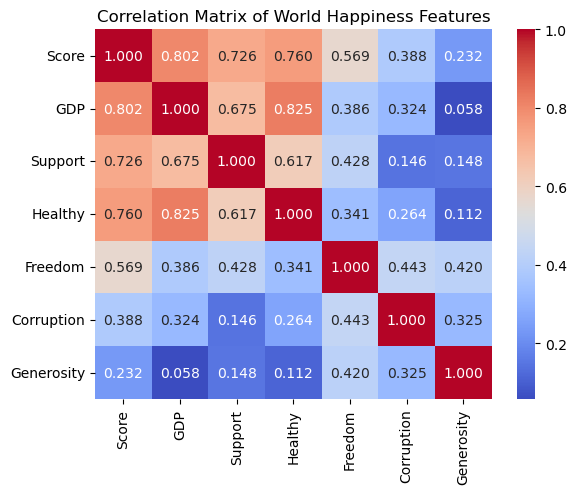

In [52]:
# Create heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.3f')
plt.title('Correlation Matrix of World Happiness Features')
plt.show()

# comparing question no 3

In [54]:
# Select only the columns with numeric data
numeric_cols = new_df_filtered.select_dtypes(include=['int64', 'float64'])

# Create a new DataFrame with only the numeric columns
numeric = pd.DataFrame(numeric_cols)

scaled_data = preprocessing.scale(numeric)
#create a PCA object 
pca = PCA()
#fit the PCA to the scaled data
pca.fit(scaled_data)
#calculation principle component
principal_components=pca.components_
#showing the principle components
print('Principle components:\n',principal_components)
#transform the scaled data using PCA
pca_data = pca.transform(scaled_data)
# Show the variance
print("Variance:")
print(pca.explained_variance_)
# print explained variance ratio in percentage 
var_ratio_pct = 100 * pca.explained_variance_ratio_
var_ratio_pct_formatted = [f'{x:.2f}%' for x in var_ratio_pct]
print("Variance ratio in percentage:")
print(var_ratio_pct_formatted)

Principle components:
 [[ 0.47851056  0.44978302  0.40848148  0.43147523  0.34550829  0.25832237
   0.17201296]
 [-0.08157345 -0.27497792 -0.22216657 -0.27089403  0.40051048  0.46941504
   0.64360876]
 [-0.0192856   0.15005772 -0.36272355  0.06787991 -0.14213456  0.75657287
  -0.49832715]
 [ 0.04277998 -0.15993581  0.18171512 -0.36313041  0.71199738 -0.07184059
  -0.54369569]
 [-0.02464376 -0.14203909  0.73206414 -0.41438347 -0.38992325  0.34571829
   0.00497393]
 [ 0.77011621  0.12526833 -0.28733932 -0.50959578 -0.18899916 -0.10967084
   0.03505344]
 [-0.41046931  0.7988231  -0.02672741 -0.41541864  0.07288386 -0.06169818
   0.10483738]]
Variance:
[3.78915798 1.35480722 0.71585597 0.52139068 0.339949   0.17353953
 0.15529962]
Variance ratio in percentage:
['53.75%', '19.22%', '10.15%', '7.40%', '4.82%', '2.46%', '2.20%']


# Variance ratio in percentage before:
['53.66%', '21.06%', '8.52%', '8.02%', '4.47%', '2.29%', '1.98%'] there is small changes in the variance ratio but we still need five principle components to keep the 95% variance for not loosing the much information. And Score has the highest effect on variance.

In [56]:
highest_feature_index=np.argmax(np.abs((pca.components_[0])))
column_with_highest_affect=numeric_df.columns[highest_feature_index]   #0-PC1, 1-PC2, 2-PC3...
print(f"The feature with the highest effect on the variance is {column_with_highest_affect}")

The feature with the highest effect on the variance is Score


In [57]:
#Calculate the averages for each feature
new_df_filtered = new_df_filtered.groupby('Country', as_index=False).mean()
display(new_df_filtered)

,Country,Score,GDP,Support,Healthy,Freedom,Corruption,Generosity
0,Albania,4.7126,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887
1,Algeria,5.6676,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219
2,Argentina,6.4594,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371
3,Armenia,4.3932,0.839133,0.890873,0.697851,0.216029,0.038767,0.082394
4,Australia,7.2762,1.394885,1.409006,0.914529,0.605043,0.314573,0.416078
...,...,...,...,...,...,...,...,...
136,Venezuela,5.5314,1.052468,1.323264,0.683741,0.213709,0.071444,0.057186
137,Vietnam,5.1546,0.723416,1.138384,0.722700,0.577207,0.091921,0.195664
138,Yemen,3.6258,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929
139,Zambia,4.5844,0.571761,0.932381,0.302761,0.462099,0.097337,0.218430


In [58]:

Country_Happiness = px.choropleth(new_df_filtered, locations='Country', locationmode='country names', 
                                  color='Score', color_continuous_scale='Turbo', title = 'Average Happiness Score By Country Map')
Country_Happiness.update_layout(margin=dict(l=40, r=40, t=40, b=40))
Country_Happiness.show()